Вычислить определенный интеграл  $F = \int_a^b y(x) \,dx$, методами прямоугольников, трапеций, Симпсона с шагами $h_1, h_2$. Оценить погрешность вычислений, используя  Ме­тод Рунге-Ромберга: 

Вариант 23 $y = \frac{1}{(2x + 7)(3x + 5)}$   $X_0 = 0, X_1 = 4, h_1 = 1, h_2 = 0.5$

In [21]:
import typing

In [22]:
def f(x:float) -> float:
    return 1/((2*x + 7) * (3*x + 5))
x_0, x_1 = 0, 4
h0, h1 = 1, 0.5

In [23]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

In [24]:
X0 = [i for i in frange(x_0, x_1, h0)]
X1 = [i for i in frange(x_0, x_1, h1)]

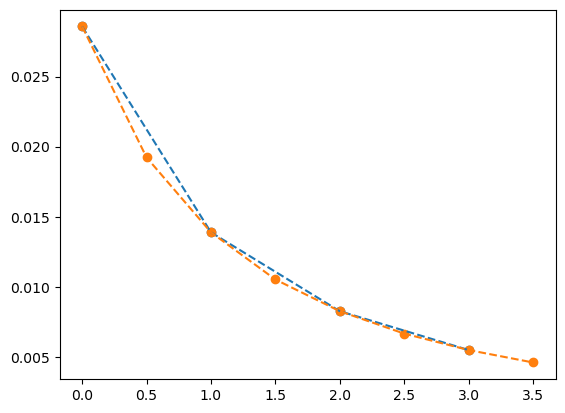

In [25]:
import matplotlib.pyplot as plt
plt.plot(X0, [f(x) for x in X0], linestyle='--')
plt.scatter(X0, [f(x) for x in X0])
plt.plot(X1, [f(x) for x in X1], linestyle='--')
plt.scatter(X1, [f(x) for x in X1])
plt.show()

In [26]:
def diff(X:list) -> list:
    diff_X = [0]
    for i in range(1, len(X)):
        diff_X.append(X[i] - X[i - 1])
    return diff_X


### Оценка погрешности вычислений мотодом Рунге-Ромберга-Ричардсона

Порядок точности для Методов прямоугольника и трапеции, и Симпсона соответсвено 

In [27]:
p_r_t, p_s = 2, 4

In [28]:
def runge_rombert(Fh:float, Fkh:float, k:float, p:float) -> float:
    return Fh + ((Fh - Fkh) / (k**p - 1))

### Метод прямоугольников

In [29]:
def rectangle(X:list, f:typing.Callable[[float], float], h:float):
    return sum([h * f((X[i-1] + X[i])/2) for i in range(1, len(X))])


In [30]:
r0, r1 = rectangle(X0, f, h0), rectangle(X1, f, h1)

print(r0)
print(r1)

0.03642375168690958
0.03959872250672447


Уточнение

In [31]:
r = runge_rombert(r0, r1, h1 - h0, p_r_t)
print(r)

0.04065704611332943


Ошибка

In [32]:
print(abs(r - r0))
print(abs(r - r1))

0.004233294426419849
0.0010583236066049606


### Метод трапеций

In [33]:
def trapezoid(X:list, f:typing.Callable[[float], float], h:float) -> float:
    return 1/2 * h * (sum([(f(X[i]) + f(X[i - 1])) for i in range(1, len(X))]))

In [34]:
t0, t1 = trapezoid(X0, f, h0), trapezoid(X1, f, h1)

print(t0)
print(t1)

0.03918631873177328
0.04033073531568669


Уточнение

In [35]:
r = runge_rombert(t0, t1, h1 - h0, p_r_t)

Ошибка

In [36]:
print(abs(r - t0))
print(abs(r - t1))

0.0015258887785512196
0.00038147219463780663


### Метод Симпсона с шагами $h_1, h_2$

In [37]:
def simpson(X:list, f:typing.Callable[[float], float], step:float):
    return step/3 * (sum([f(X[i - 1]) + 4 * f((X[i-1] + X[i])/2) + f(X[i]) for i in range(1, len(X), 2)]))

In [38]:
s0, s1 = simpson(X0, f, h0), simpson(X1, f, h1)
print(s0)
print(s1)

0.053269676451494635
0.0479692268306646


Уточнение

In [39]:
r = runge_rombert(s0, s1, h1 - h0, p_s)

Ошибка

In [40]:
print(abs(r - s0))
print(abs(r - s1))

0.005653812928885366
0.0003533633080553336
